## Getting familiar with Pandas

In [1]:
## Pandas 
# there are several ways to change a column in a dataframe
# A short intro to pandas https://pandas.pydata.org/pandas-docs/stable/10min.html

import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First step: make the dataframe
dates = pd.date_range('20130101', '20140101') #366
data = pd.DataFrame(np.random.randn(366,4), index=dates, columns=list('ABCD'))

### Exercise 1.1: Inspect the dataframe with the following commands: head(), tail(), describe.

In [3]:
# Solution
data.describe()

,A,B,C,D
count,366.000000,366.000000,366.000000,366.000000
mean,0.017629,0.005491,-0.035373,-0.040393
std,1.025466,1.004988,0.961726,0.956203
min,-3.108310,-2.821885,-3.255771,-2.906865
25%,-0.732374,-0.609101,-0.608921,-0.698682
50%,0.008178,0.011797,-0.071625,-0.018710
75%,0.726679,0.621726,0.587343,0.566725
max,2.746865,2.535413,2.773473,2.406781


In [4]:
data.head()

,A,B,C,D
2013-01-01,-0.119062,-1.255248,-1.042907,-1.132132
2013-01-02,1.208826,-1.088850,0.590667,-0.909385
2013-01-03,-1.311219,0.184445,-0.377082,0.061180
2013-01-04,0.276654,0.720240,-0.464948,0.051937
2013-01-05,-0.936258,0.785123,0.998104,1.789551


In [5]:
data.tail()

,A,B,C,D
2013-12-28,-1.418428,0.269596,0.696942,-0.338768
2013-12-29,0.114491,-1.544491,-1.228628,-1.123928
2013-12-30,0.009441,-1.085409,0.248330,-0.214657
2013-12-31,2.609983,0.335848,-1.240144,0.017542
2014-01-01,1.076237,-2.052386,-0.893091,-2.274829


### Exercise 1.2:  The index is a time series, and pandas has a build-in command for re-sampling dataframes (documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).  Use resample to get the median every 2 days and save this as a new dataframe.

In [6]:
#Solution: 
resampled_data =data.resample('2D').median()
resampled_data.head()

,A,B,C,D
2013-01-01,0.544882,-1.172049,-0.226120,-1.020758
2013-01-03,-0.517283,0.452342,-0.421015,0.056559
2013-01-05,-1.063575,-0.238167,0.834049,0.941714
2013-01-07,-0.553274,1.094546,-0.077565,-0.431513
2013-01-09,1.411867,-0.169949,1.344469,0.963416


### Exercise 1.3: Inspect the new dataframe to see the difference in size compared to the inital dataframe.

In [7]:
#Solution: 
resampled_data.describe()

,A,B,C,D
count,183.000000,183.000000,183.000000,183.000000
mean,0.017629,0.005491,-0.035373,-0.040393
std,0.718452,0.709688,0.666758,0.668308
min,-1.804277,-1.741286,-2.121984,-2.181758
25%,-0.519653,-0.480013,-0.475860,-0.484379
50%,-0.031977,-0.007915,-0.012806,-0.098429
75%,0.528211,0.470801,0.447839,0.444612
max,1.843110,2.357001,1.390750,1.959151


### Exercise 1.4:  Write your new dataframe to a csv file.

In [8]:
#Solution: 
resampled_data.to_csv('resampled_data')

### Exercise 1.5: Merge the two dataframes. There are several ways to do this, see also https://pandas.pydata.org/pandas-docs/stable/merging.html.

In [9]:
# Solution
resampled_data.merge(data,how='inner',right_index=True,left_index=True).head()

,A_x,B_x,C_x,D_x,A_y,B_y,C_y,D_y
2013-01-01,0.544882,-1.172049,-0.226120,-1.020758,-0.119062,-1.255248,-1.042907,-1.132132
2013-01-03,-0.517283,0.452342,-0.421015,0.056559,-1.311219,0.184445,-0.377082,0.061180
2013-01-05,-1.063575,-0.238167,0.834049,0.941714,-0.936258,0.785123,0.998104,1.789551
2013-01-07,-0.553274,1.094546,-0.077565,-0.431513,-1.487278,0.530999,1.384645,-0.109054
2013-01-09,1.411867,-0.169949,1.344469,0.963416,1.150087,-1.095934,1.880805,0.609692


### Exercise 1.6: There are several ways to perform actions on the dataframe columns. The dataframe has several columns containing negative values. For this exercise, find these negative values on a column, and create a new column with their absolute value, using a list comprehension, and after this, using a lambda function. You can use the magic timeit to see if there is a difference between these operations.

In [10]:
data.head()

,A,B,C,D
2013-01-01,-0.119062,-1.255248,-1.042907,-1.132132
2013-01-02,1.208826,-1.088850,0.590667,-0.909385
2013-01-03,-1.311219,0.184445,-0.377082,0.061180
2013-01-04,0.276654,0.720240,-0.464948,0.051937
2013-01-05,-0.936258,0.785123,0.998104,1.789551


In [11]:
# Solution
# method 1: list comprehension
%timeit data.A = [abs(x) for x in data.A.tolist()]
data.head()

274 µs ± 6.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


,A,B,C,D
2013-01-01,0.119062,-1.255248,-1.042907,-1.132132
2013-01-02,1.208826,-1.088850,0.590667,-0.909385
2013-01-03,1.311219,0.184445,-0.377082,0.061180
2013-01-04,0.276654,0.720240,-0.464948,0.051937
2013-01-05,0.936258,0.785123,0.998104,1.789551


In [12]:
# Solution
# method 2: lambda function
%timeit data.B = data.B.apply(lambda x : abs(x))
data.head()

711 µs ± 213 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


,A,B,C,D
2013-01-01,0.119062,1.255248,-1.042907,-1.132132
2013-01-02,1.208826,1.088850,0.590667,-0.909385
2013-01-03,1.311219,0.184445,-0.377082,0.061180
2013-01-04,0.276654,0.720240,-0.464948,0.051937
2013-01-05,0.936258,0.785123,0.998104,1.789551


## Supervised learning using scikit-learn - Classification of MNIST data

### Exercise 2.1: Download the digit ('MNIST original') dataset from  mldata.org, which is a public repository for machine learning data. Divide the data into training and testing. Please use 1/7 for training and the rest for testing. 

Hint: The sklearn.datasets package is able to directly download data sets from the repository using the function sklearn.datasets.fetch_mldata. Generate the training and testing set by importing train_test_split from sklearn.model_selection

 

In [13]:
# Solution

import sklearn 
from sklearn.datasets import fetch_mldata

# Download the MNIST original dataset
data = fetch_mldata("MNIST original")
X = data['data']
y = data['target']

# Split the images into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6/7, random_state=42)

/anaconda3/envs/ada/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/envs/ada/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### Exercise 2.2: The optimal performance of many machine learning algorithms is affected by scale. Typically, you need to scale the features in your data before applying any algorithm. Normalize the data and plot some random images from the dataset.  

Hint: Use StandardScaler from sklearn.preprocessing to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)



In [14]:
# Solution

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

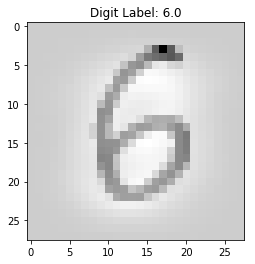

In [15]:
# Solution (Visualization)
%matplotlib inline

import matplotlib.pyplot as plt
# 784 columns correspond to 28x28 image
plottable_image = np.reshape(X_train[0], (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(y_train[0]))
plt.show()

### Exercise 2.3: Logistic regression is one of the simplest linear classification algorithms. Fit a logistic regression model to the training images. Compute the accuracy of the classifier on the test images, and the time needed to train the model.¶

Hint: Use LogisticRegression from sklearn.linear_model. To increase speed, change the default solver to 'lbfgs'


In [16]:
# Solution

from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

tic = time()
# Fit a linear regression model
clf = LogisticRegression(solver = 'lbfgs',max_iter = 100)
clf.fit(X_train,y_train)
# Compute the classification score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
toc = time()
print('The total time is %s seconds ' % (toc-tic))
print('Accuracy =',accuracy)

The total time is 13.136800050735474 seconds 
Accuracy = 0.8852


### Exercise 2.4: Apply Principle Component Analysis (PCA) to the training signals by keeping only (a) 25%, (b) 75%, and (c) 95% of the energy. For each of the three cases, output the number of the required principle components.Then, plot the Cumulative Explained Variance over PCA. Finally, choose a random image from the dataset, and show its approximation with the PCA components. 

Hint: For computing the Cumulative Explained Variance over PCA use:
```
pca.explained_variance_ratio_.cumsum()

```

In [ ]:
# Solution 
from sklearn.decomposition import PCA

# Fit a PCA model
pca = PCA().fit(X)

# Compute the number of PCA components
total = pca.singular_values_.sum()
sum = 0
i = 0
while sum < 0.25 *total :
    sum += pca.singular_values_[i]
    i+=1
n_25 = i 

while sum < 0.75 *total :
    sum += pca.singular_values_[i]
    i+=1
n_75 = i 

while sum < 0.95 *total :
    sum += pca.singular_values_[i]
    i+=1
n_95 = i 

In [ ]:
# Plot the Cumulative Explained Variance over PCA
plt.plot(pca.explained_variance_ratio_.cumsum());

In [ ]:
pca_25 = PCA(n_components=n_25).fit(X)
pca_75 = PCA(n_components=n_75).fit(X)
pca_95 = PCA(n_components=n_95).fit(X)

In [ ]:
def reshape_matrix(matrix):
    a = matrix
    n = int(np.ceil(np.sqrt(a.size))) # Dimension of smallest square matrix
    b = np.zeros(n**2)
    b[0:a.size] = a
    return b.reshape(n,n)

In [ ]:
# Choose a random image from the dataset, and show its approximation with the PCA components

plt.figure(figsize=(8,8));
rand_num = random.randint(0, len(X)-1)
# Original Image
plt.subplot(2, 2, 1);
plottable_image = np.reshape(X[rand_num], (28, 28))
# Plot the image
plt.imshow(plottable_image)
plt.title('Digit Label: {}'.format(y[rand_num]))

# Approximation
plt.subplot(2, 2, 2);
plottable_image = reshape_matrix(pca_25.transform(np.reshape(X[rand_num], (1,-1)))[0])
# Plot the image
plt.imshow(plottable_image)
plt.title('Digit Label: {}'.format(y[rand_num]))

plt.subplot(2, 2, 3);
plottable_image = reshape_matrix(pca_75.transform(np.reshape(X[rand_num], (1,-1)))[0])
# Plot the image
plt.imshow(plottable_image)
plt.title('Digit Label: {}'.format(y[rand_num]))

plt.subplot(2, 2, 4);
plottable_image = reshape_matrix(pca_95.transform(np.reshape(X[rand_num], (1,-1)))[0])
# Plot the image
plt.imshow(plottable_image)
plt.title('Digit Label: {}'.format(y[rand_num]))
plt.show()

### Exercise 2.5: Fit a logistic regression model to the approximation of the training images with 95% of explained variance. Compute the accuracy of the classifier and the time needed to train the model. Compare it to the one obtained in 2.3. What do you observe? 


In [ ]:
# Solution
X_to_test = pca_95.transform(X_test)
X_to_train = pca_95.transform(X_train)
tic = time()

# Fit a logistic regression model on the PCA coefficients

clf = LogisticRegression(solver = 'lbfgs',max_iter = 100)
clf.fit(X_to_train,y_train)

# Compute the classification score
y_pred = clf.predict(X_to_test)
accuracy = accuracy_score(y_test, y_pred)

toc = time()
print('The total time is %s seconds ' % (toc-tic))
print('Accuracy =',accuracy)

## Unsupervised learning with sklearn.cluster.KMeans()

###  Exercise 3.1: Generate a set of 6 isotropic Gaussian blobs, with 1000 samples each. Each sample should have 60 features. 

Hint: Use the sklearn.datasets.make_blobs to generate the data

In [ ]:
# Solution

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# Generate the data
X, y = make_blobs(n_samples=1000, centers=6, n_features=60)

###  Exercise 3.2: Apply PCA to the generated data. Store the first two principle components and their cluster index to a new dataframe.  Visualize the 6 blobs based only on these two components. 

In [ ]:
colors[5,None]

In [ ]:
# Solution

# Fit PCA to the data
pca_blob = PCA(n_components=2)
pca_blob = pca_blob.fit(X)
# Generate a new dataframe and store the first two Principle Components and the true cluster index
X_transformed = pca_blob.transform(X)
dataframe = pd.DataFrame(X_transformed)
dataframe['y'] = y
# Vizualize the data by plotting their representation on the two Principle Components (x and y axis)

colors = np.array([[0.85, 0.85, 0], [0, 0.5, 0], [0.25, 0.25, 1],
                  [0.3, 0.5,0.4], [0.7, 0.1, 0.3], [0.78, 0.15, 0.78]])

plt.figure(figsize=(9, 4))
plt.title("Blob Separation")
for i in np.arange(6):
    plt.scatter(
        dataframe[y == i][0],
        dataframe[y == i][1],
        c=colors[i],
        alpha=0.5,
        s=15,
        lw=0,
        label = 'blob'+str(i))
plt.xlabel("feature 0")
plt.ylabel("Feaure 1")
plt.legend();

### Exercise 3.3: Set the number of clusters to 6 and apply Kmeans clustering to the data. Compute the accuracy score between the true labels and the ones estimated by the Kmeans algorithm. 

In [ ]:
# Solution

from sklearn.cluster import KMeans

# Fit a Kmean model to the data
y_kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(X)

from scipy.stats import mode

# Uncomment this part to compute the accuracy score
#  y_true: the true cluster index
#  y_kmeans: the cluster index assigned by Kmeans

y_true = y

labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)


### Exercise 3.4: Do the same by clustering the data using only the first 2 principle components. What do you observe? 

In [ ]:
# Solution

# Fit a Kmeans model to the first 2 PCA coefficients of the data
y_kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(dataframe[[0,1]])
# Uncomment this part to compute the accuracy score
# y_true: the true cluster index
# y_kmeans: the cluster index assigned by Kmeans

y_true = dataframe['y']

labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
accuracy_score(y_true, labels)
